#  método de separación de variables


<p>Use el método de separación de variables para resolver:</p>

$$
u_t(x,t) = u_{xx}(x,t), \quad 0 < x < 1, \quad t > 0,
$$

$$
u_x(0,t) = 0, \quad u_x(1,t) = 0, \quad t > 0
$$

$$
u(x,0) = f(x) = x, \quad 0 < x < 1.
$$


transformando las condiciones tenemos que
$$
U(x,t) = X(x)T(t)
$$

$$
U_x(x,t) = X_x(x)T(t)
$$

$$
U_x(0,t) = X_x(0)T(t) = 0
$$

$$
T(t) \neq 0
$$

$$
X_x(0) = 0
$$

$$
U_x(1,t) = X_x(1)T(t) = 0
$$

$$
T(t) \neq 0
$$

$$
X_x(1) = 0
$$

Importamos las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



 Función para la condición inicial

In [2]:
def recta(x):
    return x


Expansión en serie de cosenos (por las condiciones de frontera derivadas nulas)

In [3]:
def u_0(x, N=20):  # N es el número de armónicos
    f = np.zeros(len(x))
    for n in range(1, N + 1):
        f += (2 / (n * np.pi)) * (-1)**n * np.cos(n * np.pi * x)
    return f

 Parámetros del problema

In [4]:
x = np.linspace(0, 1, 1000)
f = recta(x)

Gráfica de la condición inicial

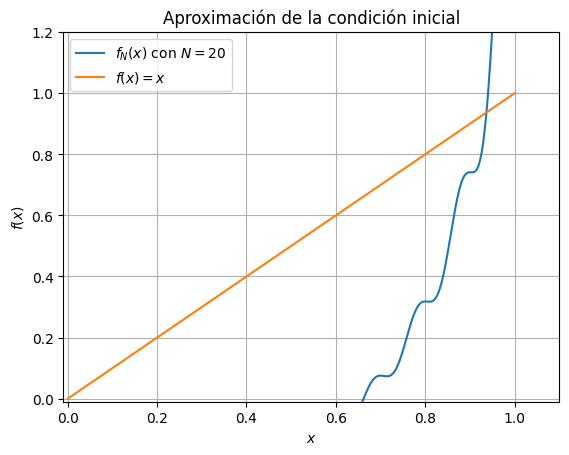

In [5]:
f_n = u_0(x)
plt.plot(x, f_n, label='$f_N(x)$ con $N=20$')
plt.plot(x, f, label='$f(x) = x$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
plt.xlim([-0.01, 1.1])
plt.ylim([-0.01, 1.2])
plt.grid()
plt.legend()
plt.show()

Aproximación con diferentes valores de N

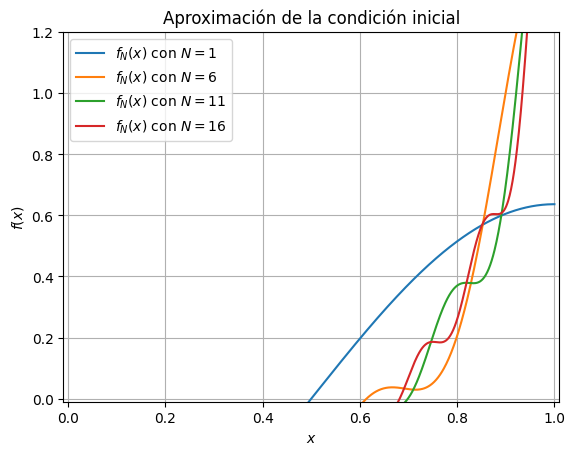

In [6]:
for i in range(1, 20, 5):
    plt.plot(x, u_0(x, i), label='$f_N(x)$ con $N=%d$' % i)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.2])
plt.grid()
plt.legend()
plt.show()

Función para la solución u(x,t)

In [7]:
def u_x_t(x, t, N=50):
    f = np.zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N + 1):
            f[:, i] += (2 / (n * np.pi)) * (-1)**n * np.cos(n * np.pi * x) * np.exp(-n**2 * np.pi**2 * t[i])
    return f


Evaluación en el tiempo

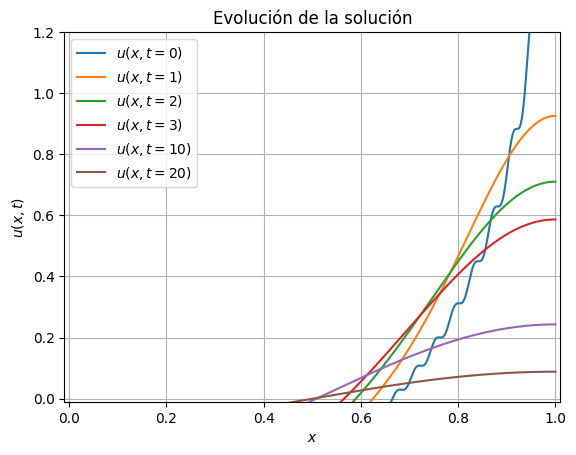

In [8]:
t = np.linspace(0, 10, 1000)
U = u_x_t(x, t)

plt.plot(x, U[:, 0], label='$u(x,t=0)$')
plt.plot(x, U[:, 1], label='$u(x,t=1)$')
plt.plot(x, U[:, 2], label='$u(x,t=2)$')
plt.plot(x, U[:, 3], label='$u(x,t=3)$')
plt.plot(x, U[:, 10], label='$u(x,t=10)$')
plt.plot(x, U[:, 20], label='$u(x,t=20)$')
plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.2])
plt.grid()
plt.legend()
plt.show()

 Graficar en 3D

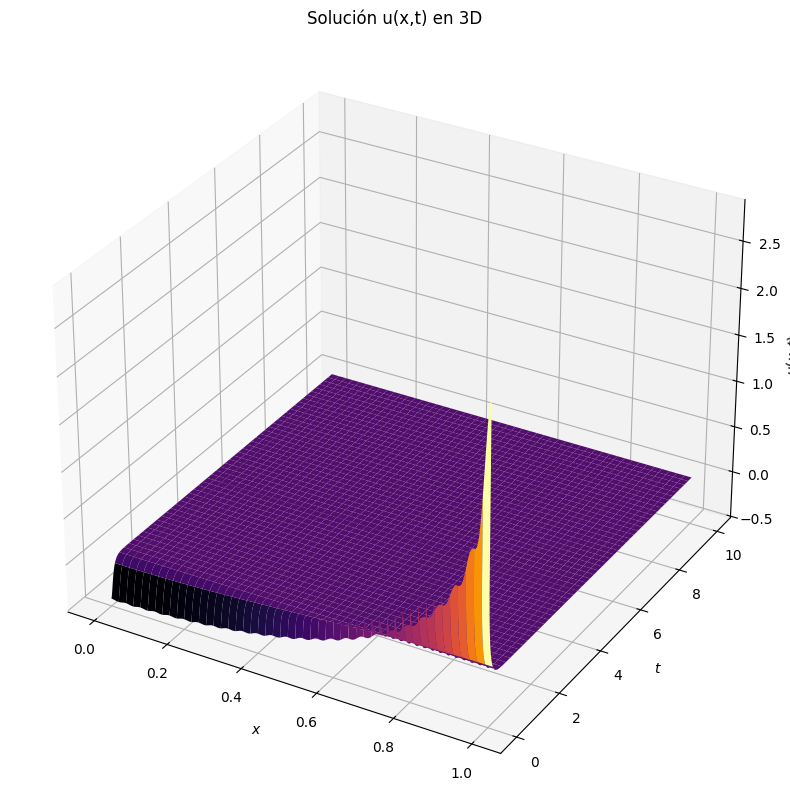

In [9]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

X, T = np.meshgrid(x, t)
U = u_x_t(x, t)

ax.plot_surface(X, T, U.T, cmap="inferno")  # Se usa U.T para coincidir con X, T
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$u(x,t)$')
plt.title("Solución u(x,t) en 3D")
plt.show()